In [1]:
import requests #untuk mengambil data dari halaman website dengan mengirimkan request ke server situs web
import pandas as pd #untuk mengolah data
import seaborn as sns #untuk memvisualisasikan data
import matplotlib.pyplot as plt #untuk memvisualisasikan data
from bs4 import BeautifulSoup as bs4 # untuk mempermudah web scraping

In [2]:
continents_page = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents").text
continents_page # ambil data dari halaman website wikipedia

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by continents - Simple English Wikipedia, the free encyclopedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled v

In [3]:
continents_countries_soup = bs4(continents_page, "lxml")
continents = continents_countries_soup.find_all('h2' > 'span', {"class":"mw-headline"})
continents #untuk mengambil data benua saja

[<span class="mw-headline" id="Africa">Africa</span>,
 <span class="mw-headline" id="Antarctica">Antarctica</span>,
 <span class="mw-headline" id="Asia">Asia</span>,
 <span class="mw-headline" id="Europe">Europe</span>,
 <span class="mw-headline" id="North_America">North America</span>,
 <span class="mw-headline" id="South_America">South America</span>,
 <span class="mw-headline" id="Oceania">Oceania</span>,
 <span class="mw-headline" id="References">References</span>,
 <span class="mw-headline" id="Other_websites">Other websites</span>]

In [4]:
unwanted_words = ["Antarctica","References","Other websites"]
target_continents = [continent.text for continent in continents if continent.text not in unwanted_words]
target_continents #untuk menghapus data yang tidak diperlukan

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

In [5]:
ol_html = continents_countries_soup.find_all('ol')
all_countries = [countries.find_all('li',{"class": None, "id": None}) for countries in ol_html]
all_countries #untuk mengambil data negara yang ada dalam benua yang sudah dipilih

[[<li><a href="/wiki/Algeria" title="Algeria">Algeria</a> - <a href="/wiki/Algiers" title="Algiers">Algiers</a></li>,
  <li><a href="/wiki/Angola" title="Angola">Angola</a> - <a href="/wiki/Luanda" title="Luanda">Luanda</a></li>,
  <li><a href="/wiki/Benin" title="Benin">Benin</a> - <a class="mw-redirect" href="/wiki/Porto_Novo" title="Porto Novo">Porto Novo</a>, <a href="/wiki/Cotonou" title="Cotonou">Cotonou</a></li>,
  <li><a href="/wiki/Botswana" title="Botswana">Botswana</a> - <a href="/wiki/Gaborone" title="Gaborone">Gaborone</a></li>,
  <li><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a> - <a href="/wiki/Ouagadougou" title="Ouagadougou">Ouagadougou</a></li>,
  <li><a href="/wiki/Burundi" title="Burundi">Burundi</a> - <a href="/wiki/Gitega" title="Gitega">Gitega</a></li>,
  <li><a href="/wiki/Cameroon" title="Cameroon">Cameroon</a> (also spelled Cameroun) - <a href="/wiki/Yaound%C3%A9" title="Yaoundé">Yaoundé</a></li>,
  <li><a href="/wiki/Cape_Verde" title="Ca

In [6]:
countries_in_continents = []
for items in all_countries:
    countries = []
    if items:
        for country in items:
            countries = [country.find('a').text for country in items if country.find('a')]
        countries_in_continents.append(countries)
countries_in_continents  #untuk memisahkan data khusus nama negara yang ada di benua yang sudah dipilih

[['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Republic of the Congo',
  'Democratic Republic of the Congo',
  "Côte d'Ivoire",
  'Djibouti',
  'Equatorial Guinea',
  'Egypt',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'The Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Réunion',
  'Rwanda',
  'São Tomé and Príncipe',
  'Senegal',
  'Seychelles',
  'Sierra Leone',
  'Somalia',
  'South Africa',
  'South Sudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Western Sahara',
  'Zambia',
  'Zimbabwe'],
 ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China',
  'East Timor',
  'Georgia',
  '

In [7]:
countries_continent_category_df = pd.DataFrame(
    zip(countries_in_continents, target_continents), columns=['Country', 'Continent'])
countries_continent_category_df #untuk menggabungkan nama negara dengan benua

,Country,Continent
0,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",Africa
1,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba...",Asia
2,"[Albania, Andorra, Austria, Belarus, Belgium, ...",Europe
3,"[Canada, Mexico, United States of America, Nav...",North America
4,"[Brazil, Argentina, Bolivia, Chile, Colombia, ...",South America
5,"[Australia, Fiji, New Zealand, Federated State...",Oceania


In [8]:
countries_continent_category_df = countries_continent_category_df.explode(
    'Country').reset_index(drop=True)
countries_continent_category_df #untuk memisahkan nama negara dengan benua nya jadi perbaris

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
201,Samoa,Oceania
202,Solomon Islands,Oceania
203,Tonga,Oceania
204,Tuvalu,Oceania


In [9]:
countries_score_page = requests.get("https://dmerharyana.org/world-happiness-index/")
countries_score_soup = bs4(countries_score_page.content, 'lxml') #mengambil data menggunakan library requests

In [10]:
countries_score_table = countries_score_soup.find('table', {'class':'table'})
countries_score_table #untuk mengambil data dikelas table

<table class="jsx-1878461898 table table-striped tp-table-body" style="width: 86.6758%; height: 3744px;">
<thead>
<tr style="height: 51px;">
<th class="datatable-th" style="width: 7.46501%; height: 51px;" width="auto"><a data-field="rank">Rank</a></th>
<th class="datatable-th" style="width: 28.3048%; height: 51px;" width="auto"><a data-field="country">Country</a></th>
<th class="datatable-th" style="width: 20.9953%; height: 51px;" width="auto"><a data-field="happiness2021">Happiness 2022 </a></th>
<th class="datatable-th" style="width: 20.0622%; height: 51px;" width="auto"><a data-field="happiness2020">Happiness 2020</a></th>
<th class="datatable-th" style="width: 20.9953%; height: 51px;" width="auto"><a data-field="pop2022">2022 Population</a></th>
</tr>
</thead>
<tbody>
<tr style="height: 25px;">
<td style="width: 7.46501%; height: 25px;">1</td>
<td style="width: 28.3048%; height: 25px;">Finland</td>
<td style="width: 20.9953%; height: 25px;">7.842</td>
<td style="width: 20.0622%; he

In [11]:
countries_score_df = pd.read_html(str(countries_score_table))
countries_score_df #untuk membaca dan mengambil data berdasarkan tabel yang ada di web

[     Rank      Country  Happiness 2022  Happiness 2020  2022 Population
 0       1      Finland           7.842           7.809          5554960
 1       2      Denmark           7.620           7.646          5834950
 2       3  Switzerland           7.571           7.560          8773637
 3       4      Iceland           7.554           7.504           345393
 4       5  Netherlands           7.464           7.449         17211447
 ..    ...          ...             ...             ...              ...
 141   142      Lesotho           3.512           3.653          2175699
 142   143     Botswana           3.467           3.479          2441162
 143   144       Rwanda           3.415           3.312         13600464
 144   145     Zimbabwe           3.145           3.299         15331428
 145   146  Afghanistan           2.523           2.567         40754388
 
 [146 rows x 5 columns]]

In [12]:
countries_score_df = countries_score_df[0]
countries_score_df = countries_score_df.rename(columns={"Country or region":"Country"})
countries_score_df #membuat tabel data

,Rank,Country,Happiness 2022,Happiness 2020,2022 Population
0,1,Finland,7.842,7.809,5554960
1,2,Denmark,7.620,7.646,5834950
2,3,Switzerland,7.571,7.560,8773637
3,4,Iceland,7.554,7.504,345393
4,5,Netherlands,7.464,7.449,17211447
...,...,...,...,...,...
141,142,Lesotho,3.512,3.653,2175699
142,143,Botswana,3.467,3.479,2441162
143,144,Rwanda,3.415,3.312,13600464
144,145,Zimbabwe,3.145,3.299,15331428


In [13]:
merged_df = pd.merge(countries_score_df, countries_continent_category_df, how='inner', on='Country')
merged_df.to_csv('final_result.csv')
merged_df #untuk menggabungkan tabel data dengan data benua yang sudah di scraping sebelumnya dan memasukkannya ke dalam file final_result.csv

,Rank,Country,Happiness 2022,Happiness 2020,2022 Population,Continent
0,1,Finland,7.842,7.809,5554960,Europe
1,2,Denmark,7.620,7.646,5834950,Europe
2,3,Switzerland,7.571,7.560,8773637,Europe
3,4,Iceland,7.554,7.504,345393,Europe
4,5,Netherlands,7.464,7.449,17211447,Europe
...,...,...,...,...,...,...
137,142,Lesotho,3.512,3.653,2175699,Africa
138,143,Botswana,3.467,3.479,2441162,Africa
139,144,Rwanda,3.415,3.312,13600464,Africa
140,145,Zimbabwe,3.145,3.299,15331428,Africa


Text(0, 0.5, 'Happiness Score')

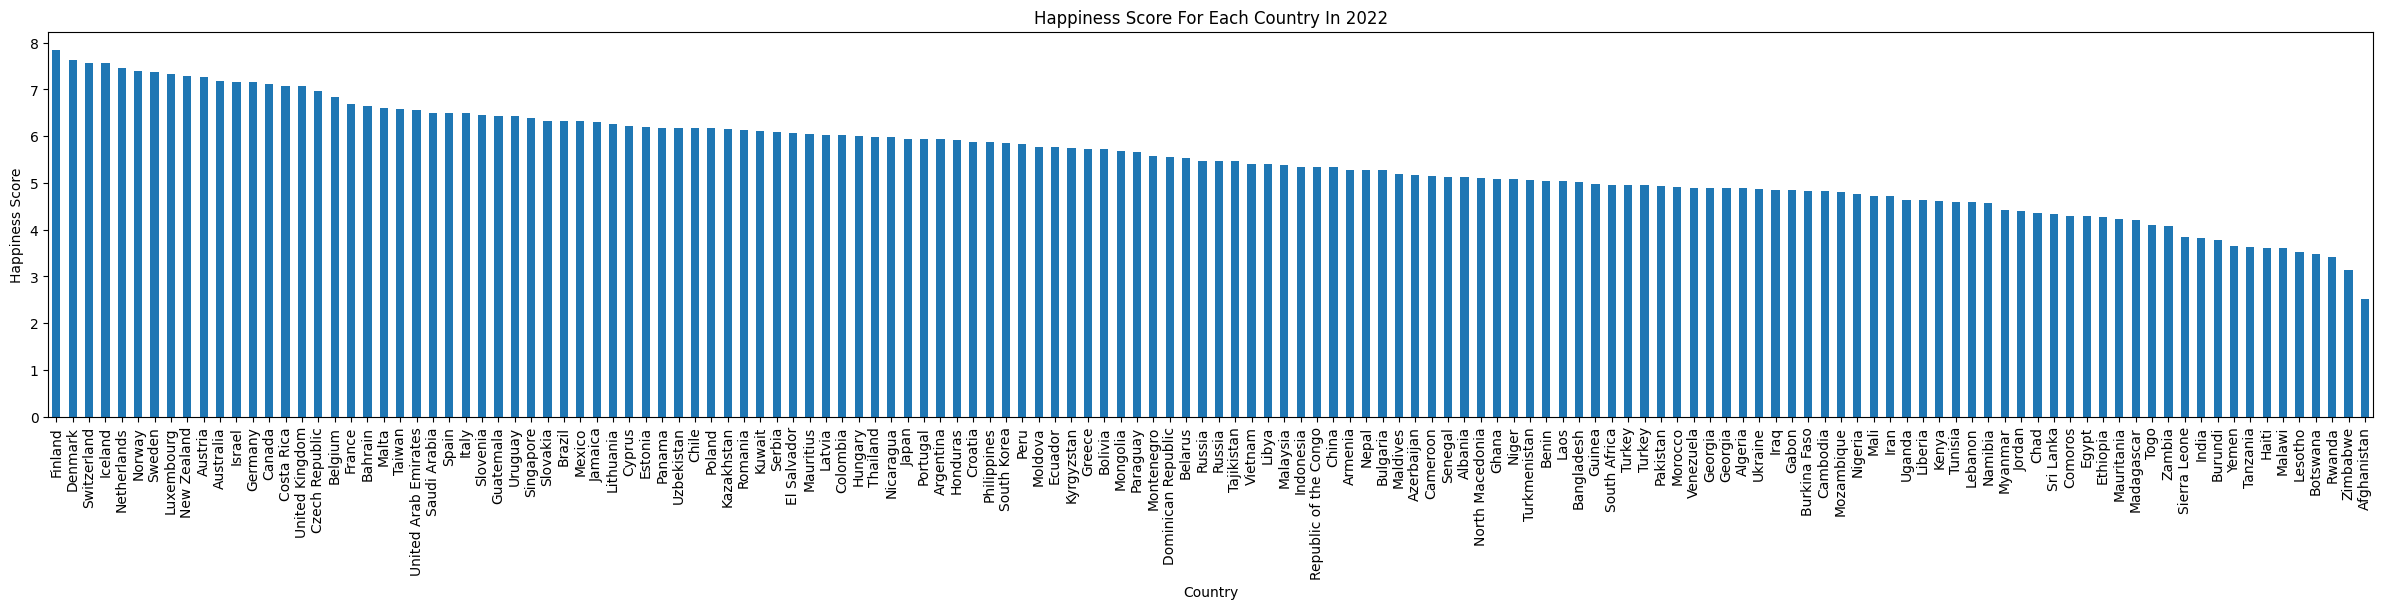

In [14]:
final_result_df_score_index = pd.read_csv('final_result.csv', index_col=2)
ax = final_result_df_score_index['Happiness 2022'].plot(kind='bar', figsize=(30,5), title="Happiness Score For Each Country In 2022")
ax.set_ylabel("Happiness Score")

Text(0, 0.5, 'Happiness Score')

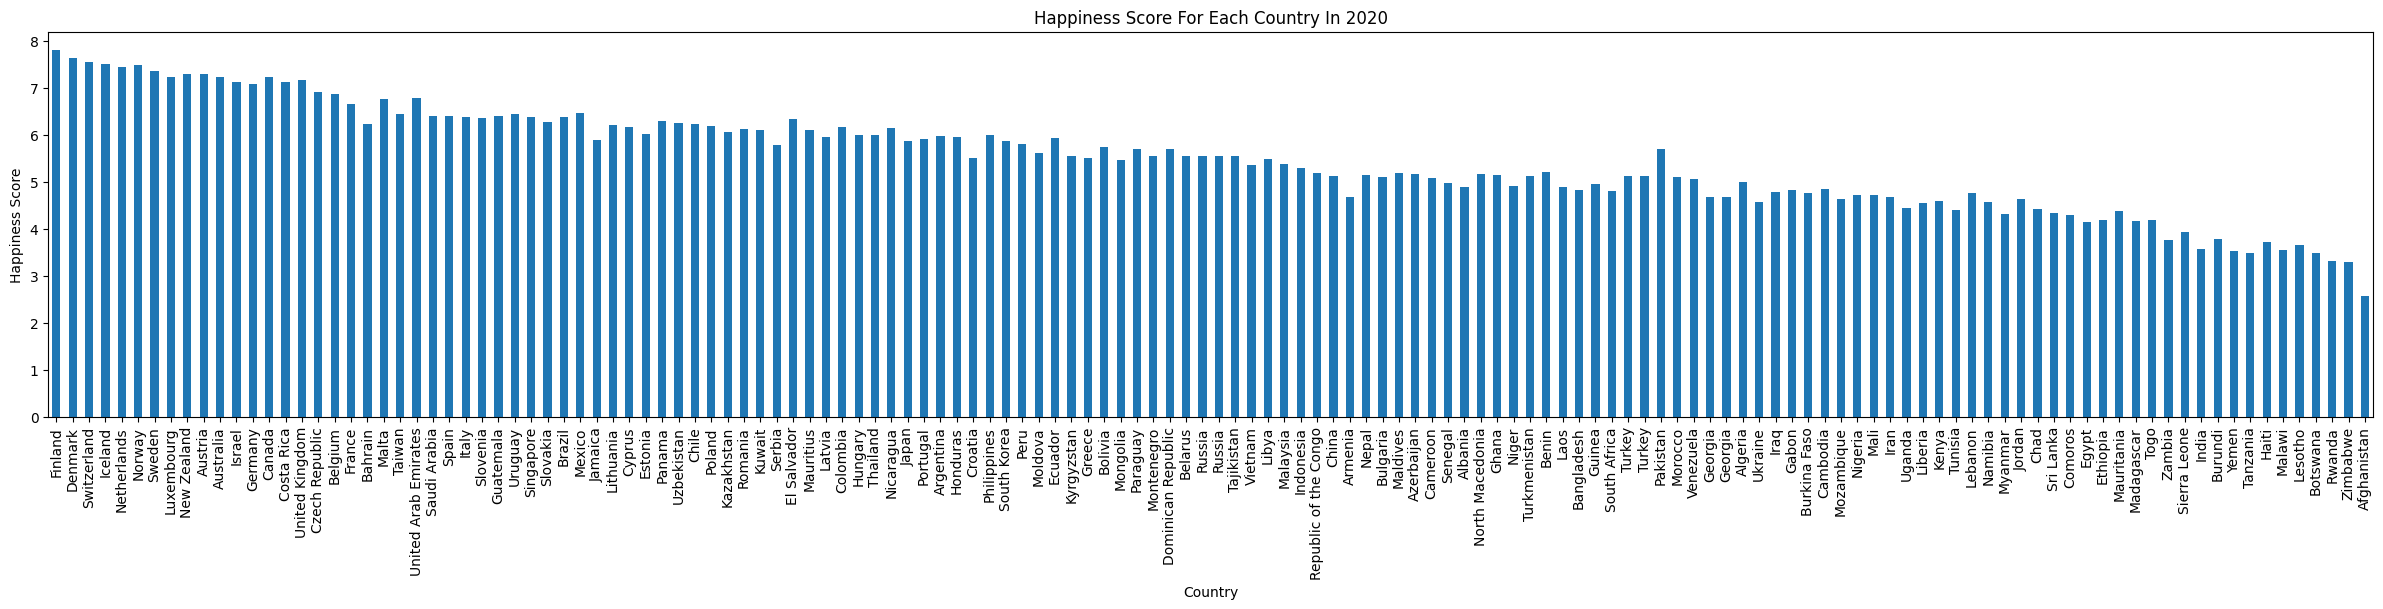

In [15]:
final_result_df_score_index = pd.read_csv('final_result.csv', index_col=2)
ax = final_result_df_score_index['Happiness 2020'].plot(kind='bar', figsize=(30,5), title="Happiness Score For Each Country In 2020")
ax.set_ylabel("Happiness Score")

Text(0, 0.5, 'Population Score')

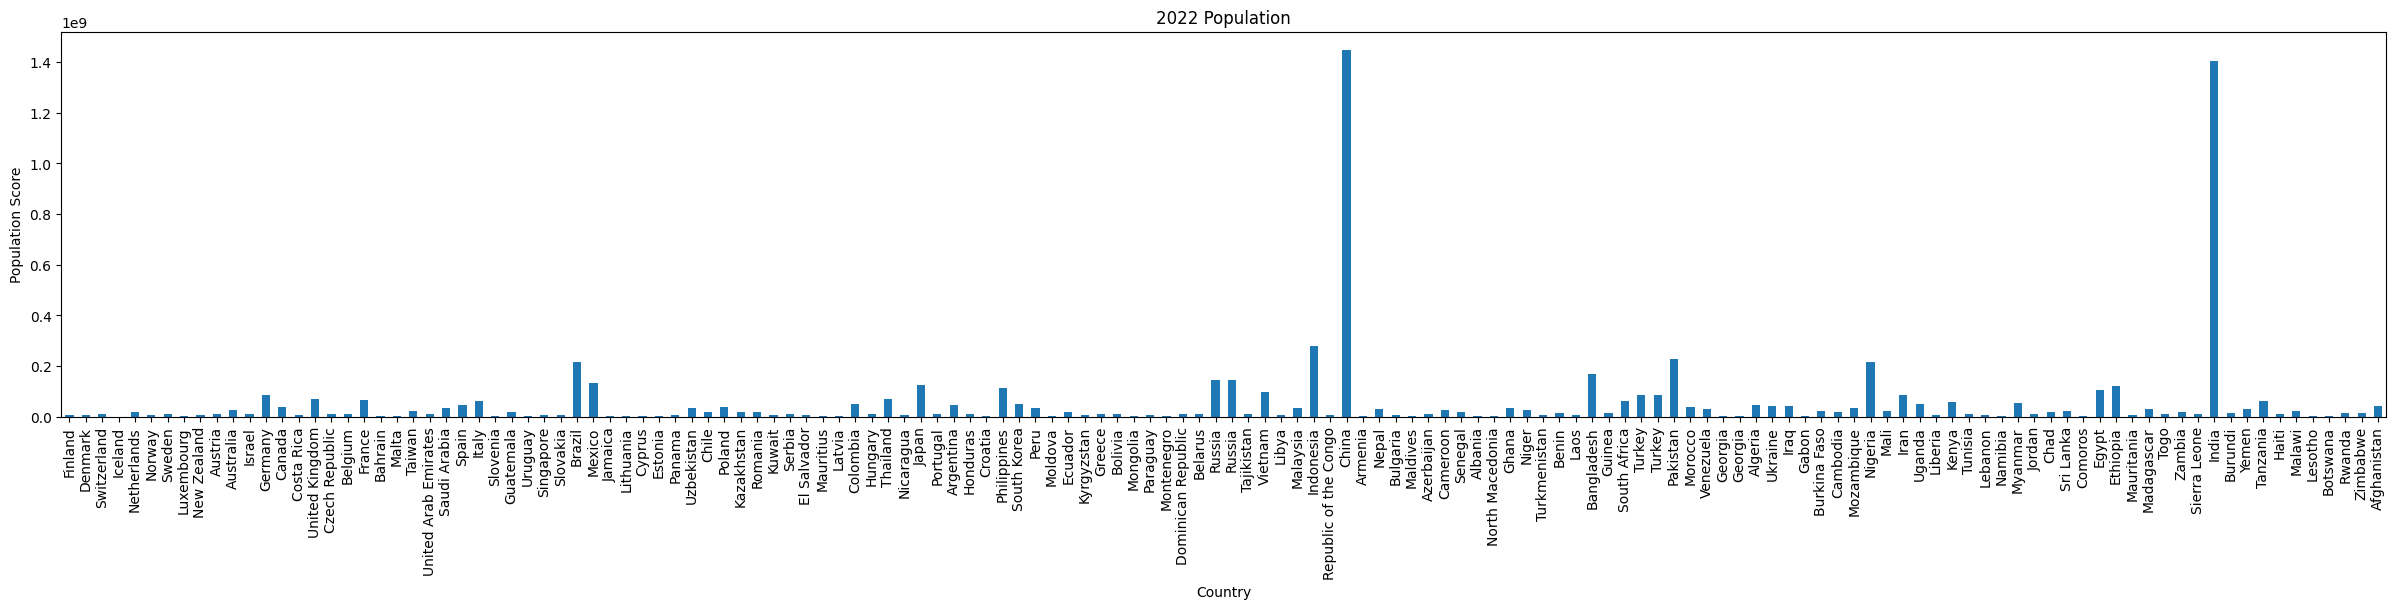

In [26]:
final_result_df_score_index = pd.read_csv('final_result.csv', index_col=2)
ax = final_result_df_score_index['2022 Population'].plot(kind='bar', figsize=(30,5), title="2022 Population")
ax.set_ylabel("Population Score")

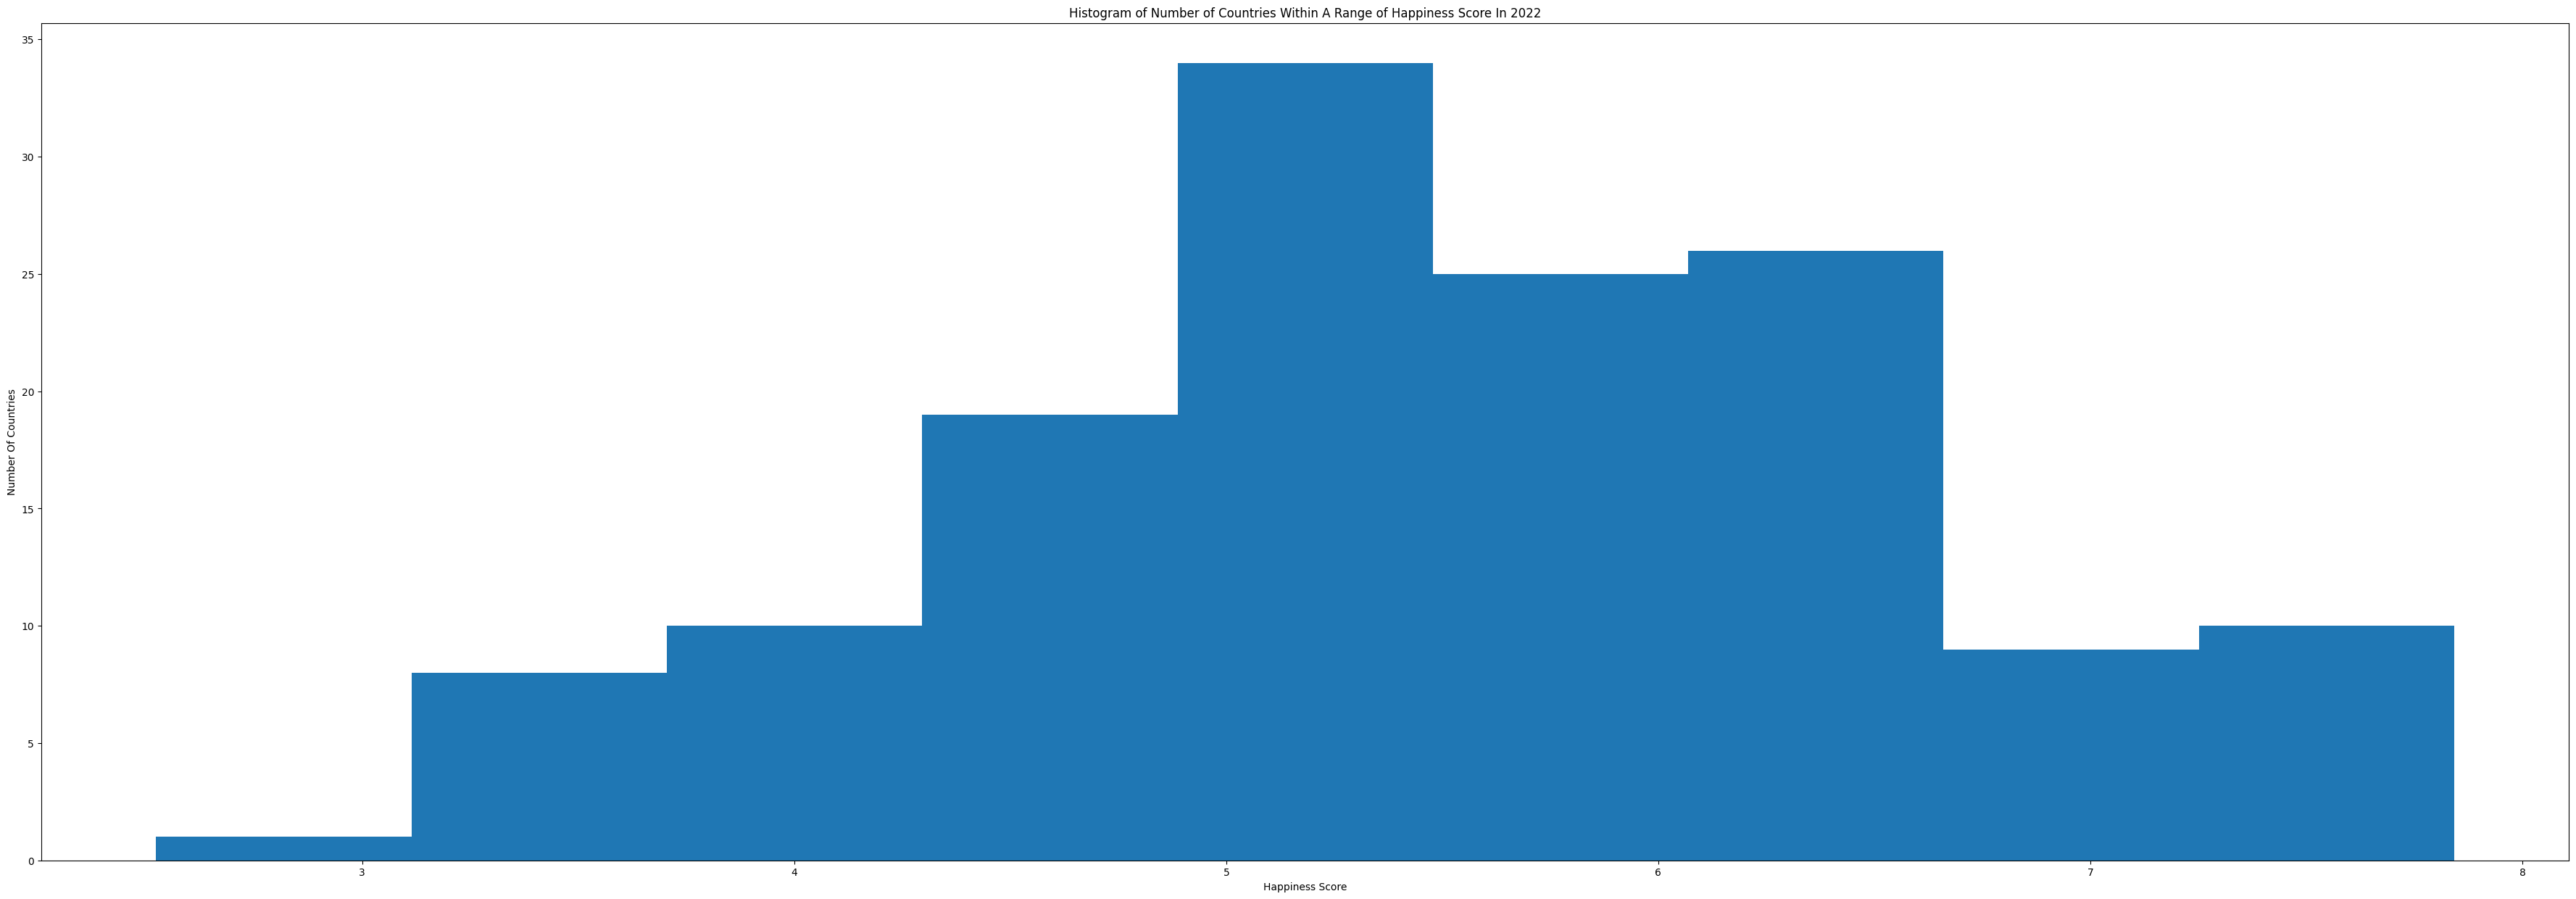

In [16]:
plt.figure(figsize=(45,15))
plt.title("Histogram of Number of Countries Within A Range of Happiness Score In 2022")
plt.xlabel("Happiness Score")
plt.ylabel("Number Of Countries")
plt.hist(final_result_df_score_index['Happiness 2022'], bins=9)
plt.show()

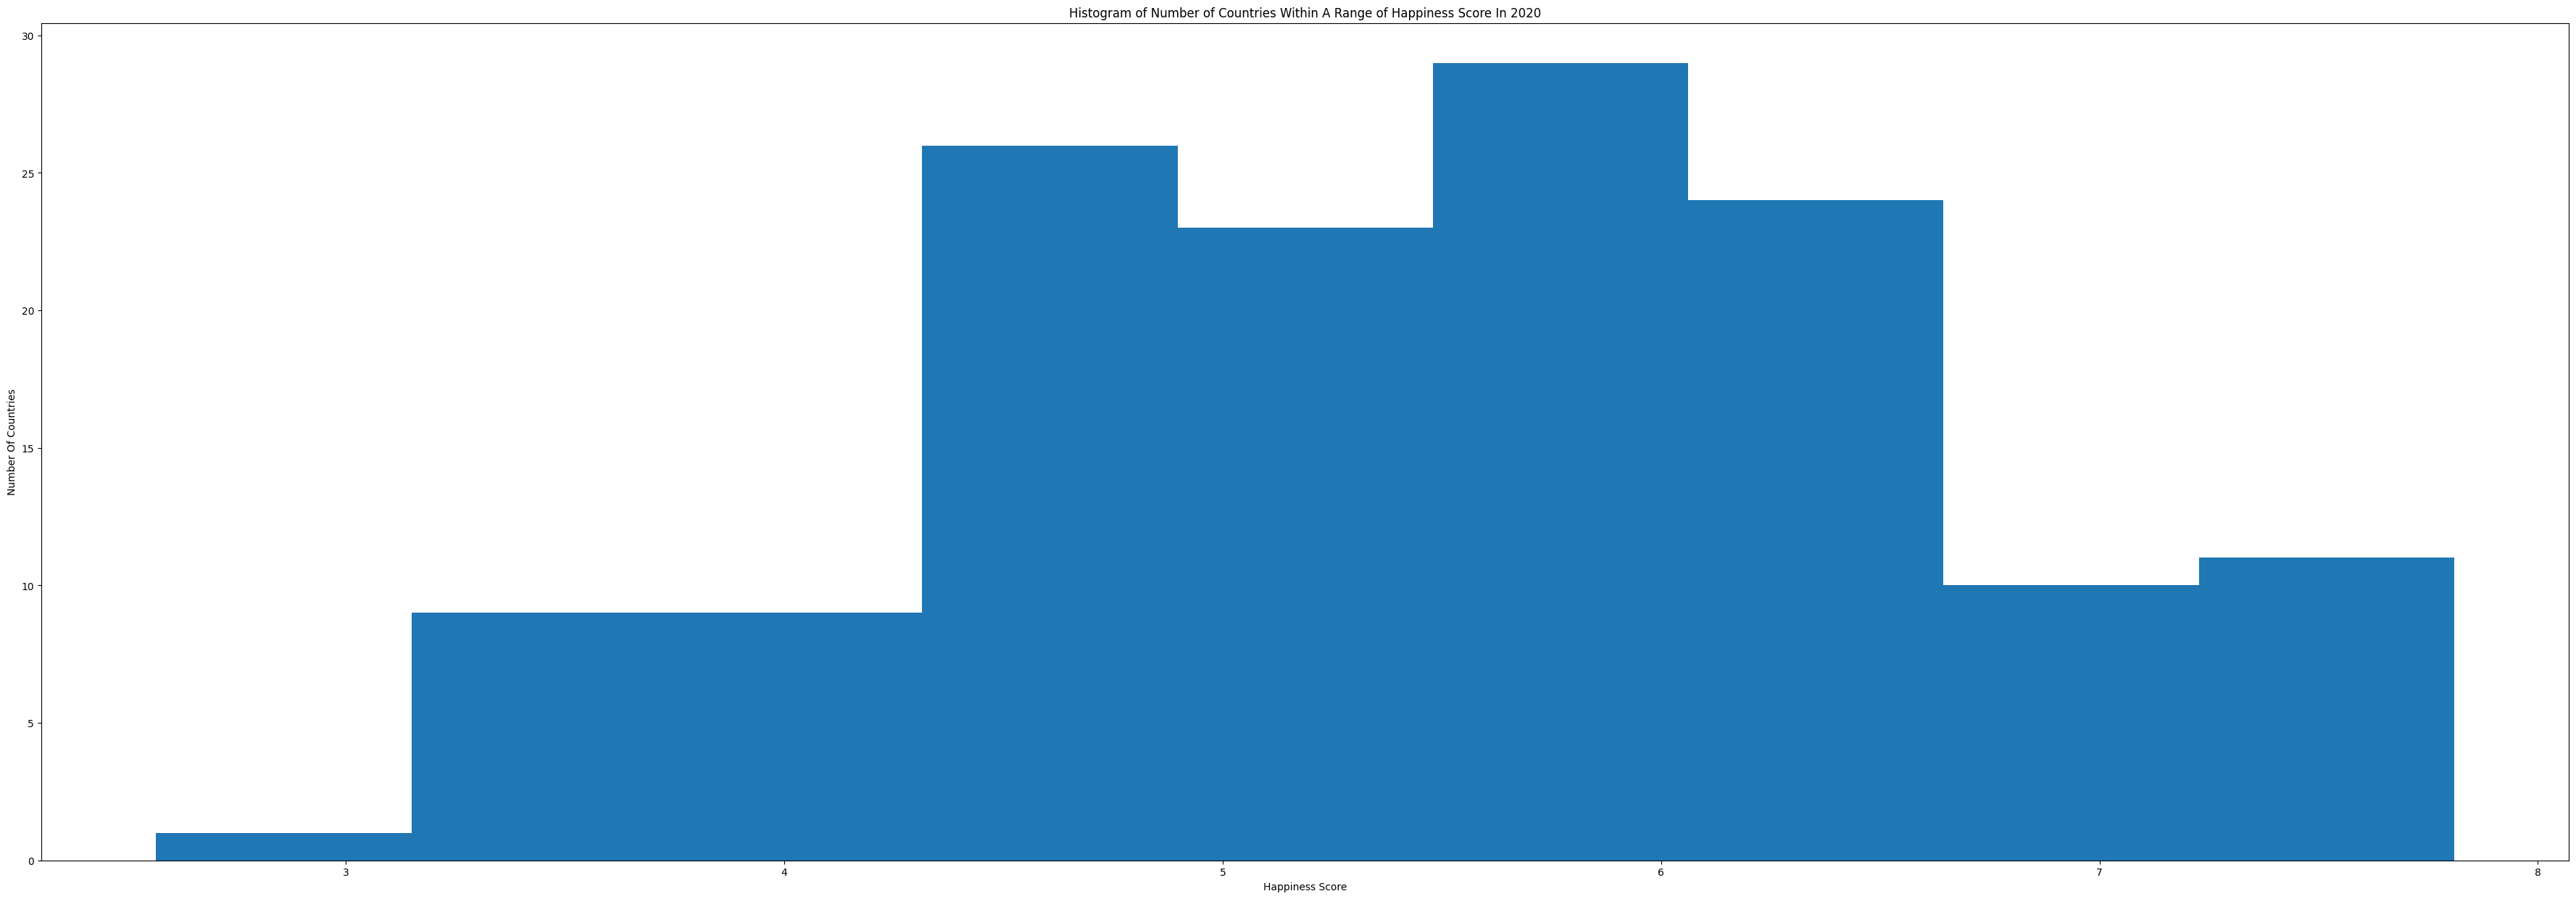

In [17]:
plt.figure(figsize=(45,15))
plt.title("Histogram of Number of Countries Within A Range of Happiness Score In 2020")
plt.xlabel("Happiness Score")
plt.ylabel("Number Of Countries")
plt.hist(final_result_df_score_index['Happiness 2020'], bins=9)
plt.show()

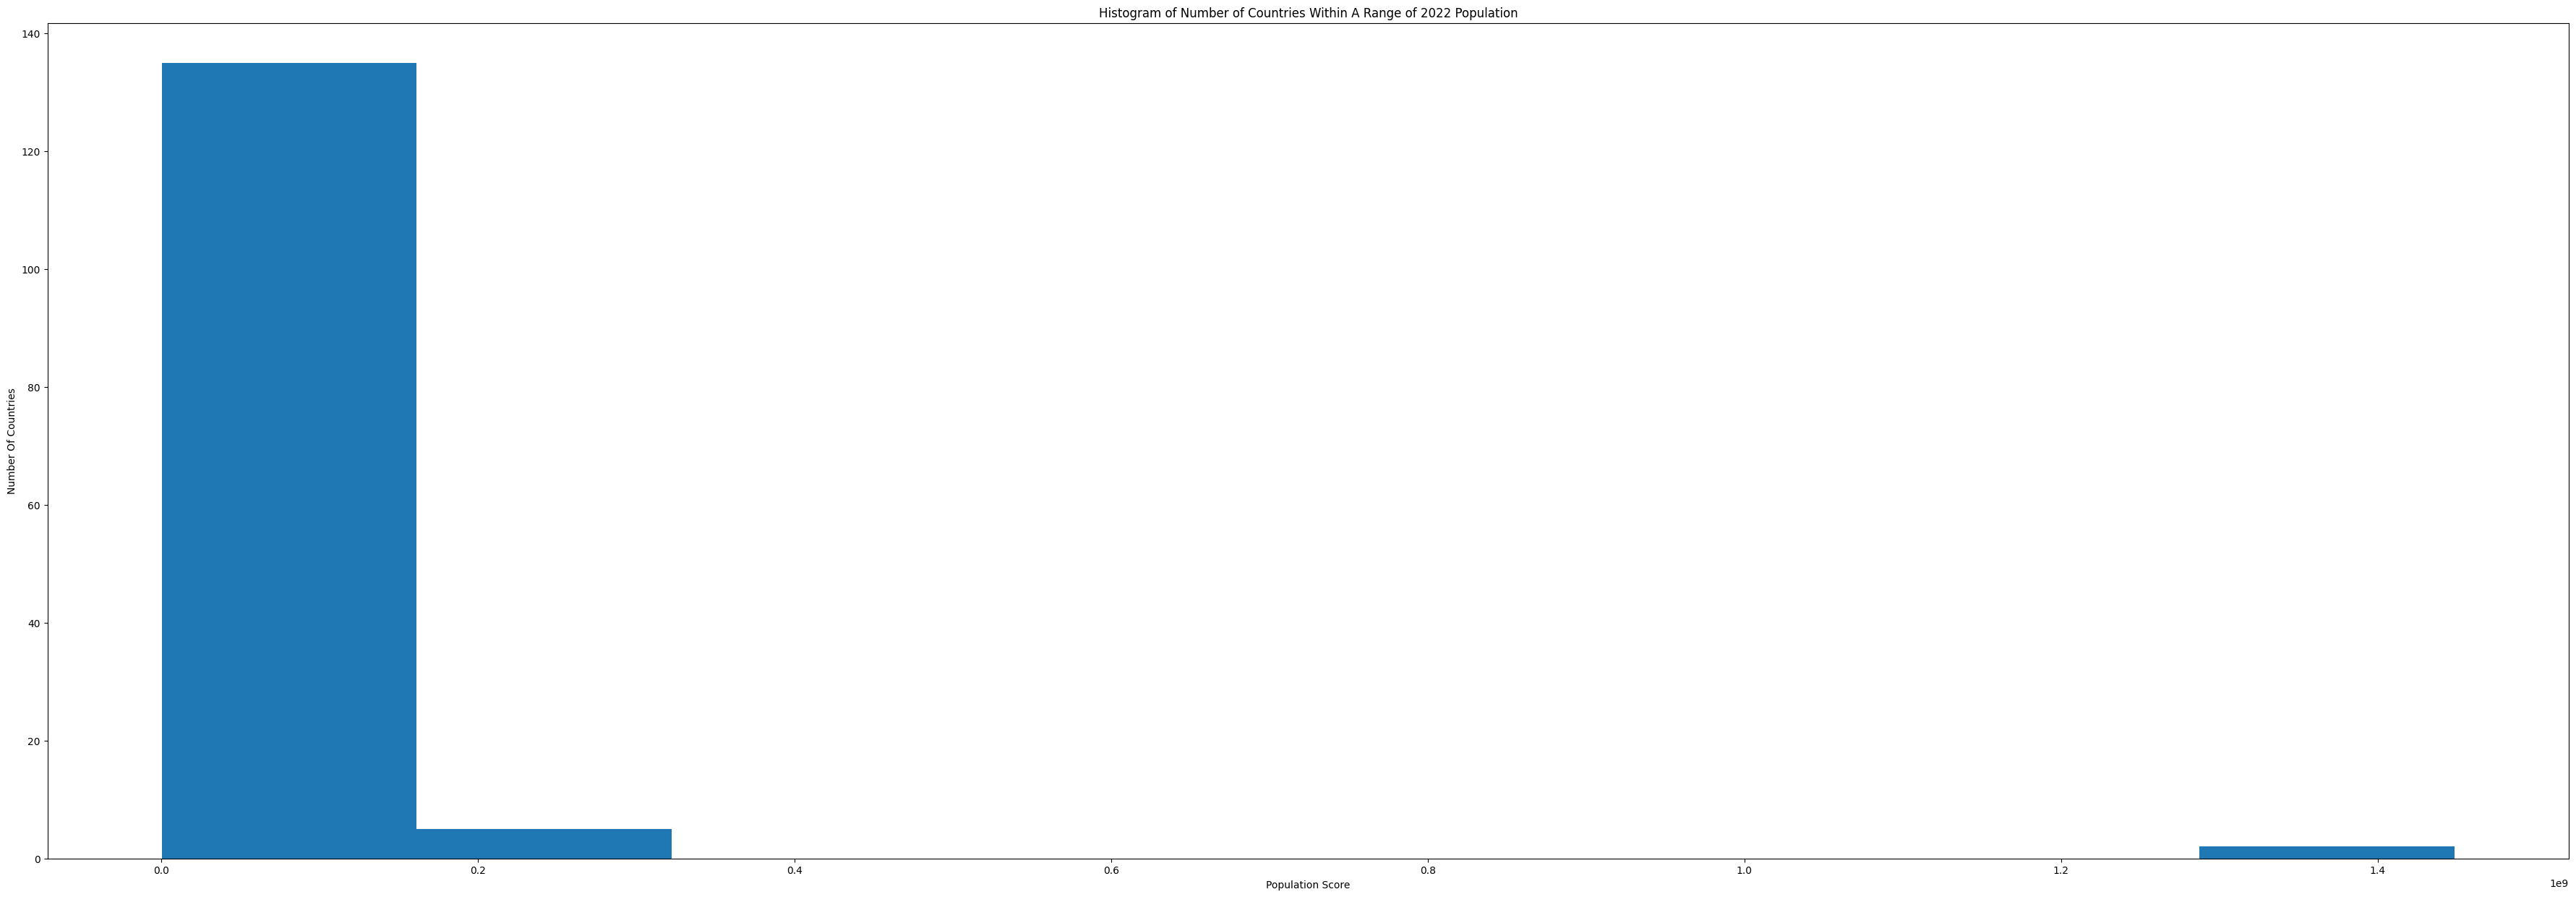

In [25]:
plt.figure(figsize=(45,15))
plt.title("Histogram of Number of Countries Within A Range of 2022 Population")
plt.xlabel("Population Score")
plt.ylabel("Number Of Countries")
plt.hist(final_result_df_score_index['2022 Population'], bins=9)
plt.show()

In [18]:
median_happiness_score = merged_df['Happiness 2020'].median()
countries_above_median = merged_df.loc[merged_df['Happiness 2020'] > median_happiness_score]
print(countries_above_median['Country'].to_list())

['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands', 'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria', 'Australia', 'Israel', 'Germany', 'Canada', 'Costa Rica', 'United Kingdom', 'Czech Republic', 'Belgium', 'France', 'Bahrain', 'Malta', 'Taiwan', 'United Arab Emirates', 'Saudi Arabia', 'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania', 'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland', 'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador', 'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand', 'Nicaragua', 'Japan', 'Portugal', 'Argentina', 'Honduras', 'Philippines', 'South Korea', 'Peru', 'Moldova', 'Ecuador', 'Kyrgyzstan', 'Bolivia', 'Paraguay', 'Montenegro', 'Dominican Republic', 'Belarus', 'Russia', 'Russia', 'Tajikistan', 'Pakistan']


In [19]:
median_happiness_score = merged_df['Happiness 2022'].median()
countries_above_median = merged_df.loc[merged_df['Happiness 2022'] > median_happiness_score]
print(countries_above_median['Country'].to_list())

['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands', 'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria', 'Australia', 'Israel', 'Germany', 'Canada', 'Costa Rica', 'United Kingdom', 'Czech Republic', 'Belgium', 'France', 'Bahrain', 'Malta', 'Taiwan', 'United Arab Emirates', 'Saudi Arabia', 'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania', 'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland', 'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador', 'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand', 'Nicaragua', 'Japan', 'Portugal', 'Argentina', 'Honduras', 'Croatia', 'Philippines', 'South Korea', 'Peru', 'Moldova', 'Ecuador', 'Kyrgyzstan', 'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro', 'Dominican Republic', 'Belarus']


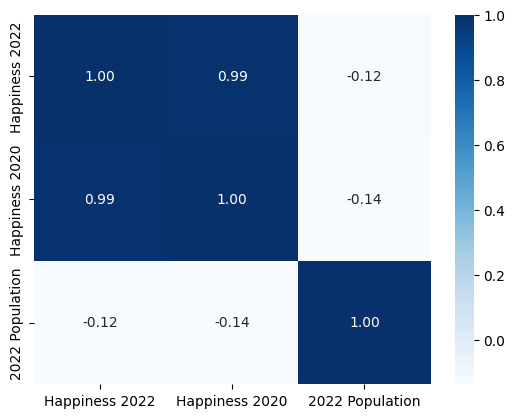

In [20]:
heatmap_df = merged_df.drop(['Rank', 'Country', 'Continent'], axis=1)
ax = sns.heatmap(heatmap_df.corr(), annot=True, fmt='.2f', cmap='Blues') 

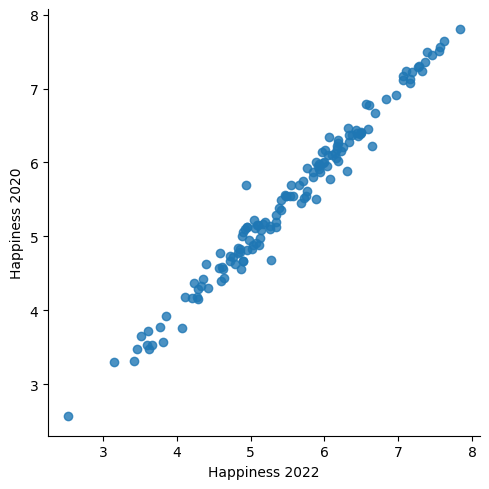

In [21]:
sns.lmplot(x='Happiness 2022', y='Happiness 2020', data=merged_df, fit_reg=False)

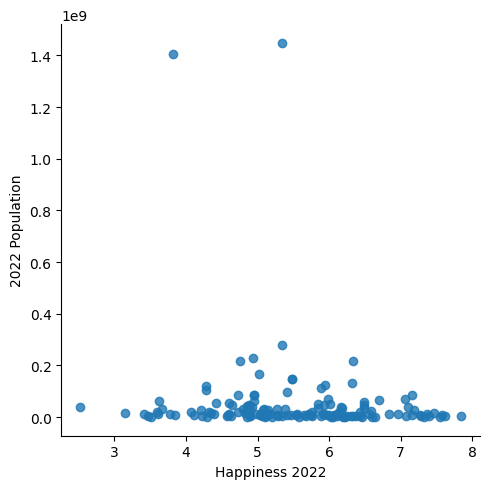

In [22]:
sns.lmplot(x='Happiness 2022', y='2022 Population', data=merged_df, fit_reg=False)

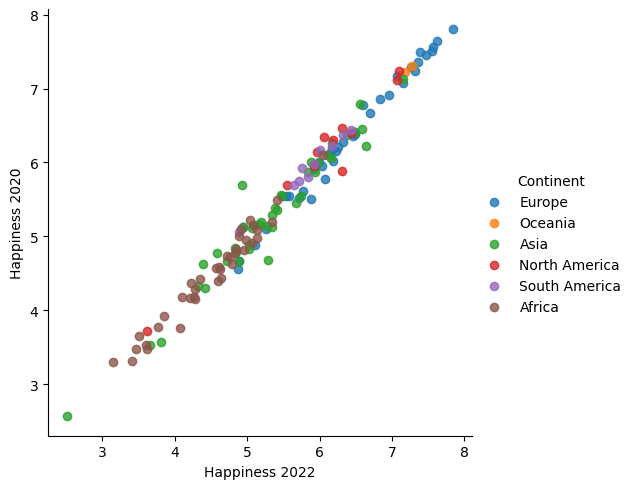

In [23]:
sns.lmplot(x='Happiness 2022', y='Happiness 2020', data=merged_df, fit_reg=False, hue='Continent')

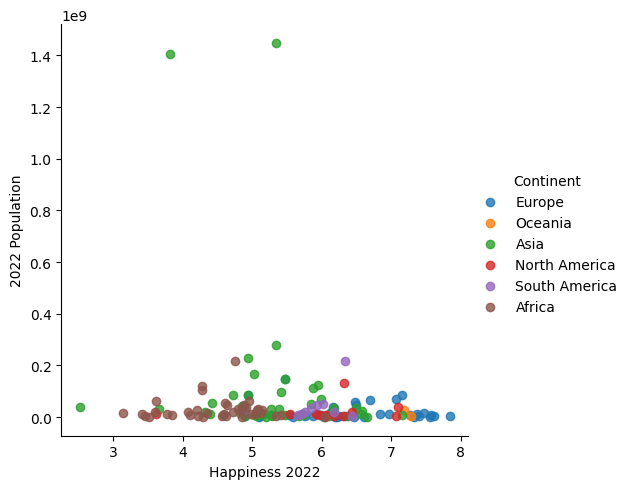

In [24]:
sns.lmplot(x='Happiness 2022', y='2022 Population', data=merged_df, fit_reg=False, hue='Continent')